<a href="https://colab.research.google.com/github/Debarsho/Machine-Learning/blob/master/PML_BayesianLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
np.random.seed(42)

 
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (9, 9)

import seaborn as sns

from IPython.core.pylabtools import figsize

# Scipy helper functions
from scipy.stats import percentileofscore
from scipy import stats

# Distributions
import scipy

# PyMC3 for Bayesian Inference
import pymc3 as pm

In [0]:
data=pd.read_csv('train.csv')
data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [0]:
data.shape

(333, 15)

In [0]:
data.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [0]:
# Print the value counts for categorical columns
for col in data.columns:
    if data[col].dtype=='object':
        print('\nColumn Name:', col)
        print(data[col].value_counts())
# No output ensures that there are no categorial columns    

In [0]:
# Our target variable is medv
# Checking correlations of other features with 'medv' for effective feature selection
data.corr()['medv'].sort_values()

lstat     -0.738600
ptratio   -0.481376
indus     -0.473932
tax       -0.448078
nox       -0.413054
crim      -0.407454
age       -0.358888
rad       -0.352251
ID        -0.221694
chas       0.204390
dis        0.249422
black      0.336660
zn         0.344842
rm         0.689598
medv       1.000000
Name: medv, dtype: float64

In [0]:
# Selecting only top 6 correleted features namely lstat,ptratio,indus,rm,zn,black and dropping other columns.
xtrain = data.drop(columns=['tax', 'nox', 'crim', 'age','rad','ID','chas','dis'])
xtrain.head()
    

,zn,indus,rm,ptratio,black,lstat,medv
0,18.0,2.31,6.575,15.3,396.90,4.98,24.0
1,0.0,7.07,6.421,17.8,396.90,9.14,21.6
2,0.0,2.18,6.998,18.7,394.63,2.94,33.4
3,0.0,2.18,7.147,18.7,396.90,5.33,36.2
4,12.5,7.87,6.012,15.2,395.60,12.43,22.9


In [0]:
xtrain.shape

(333, 7)

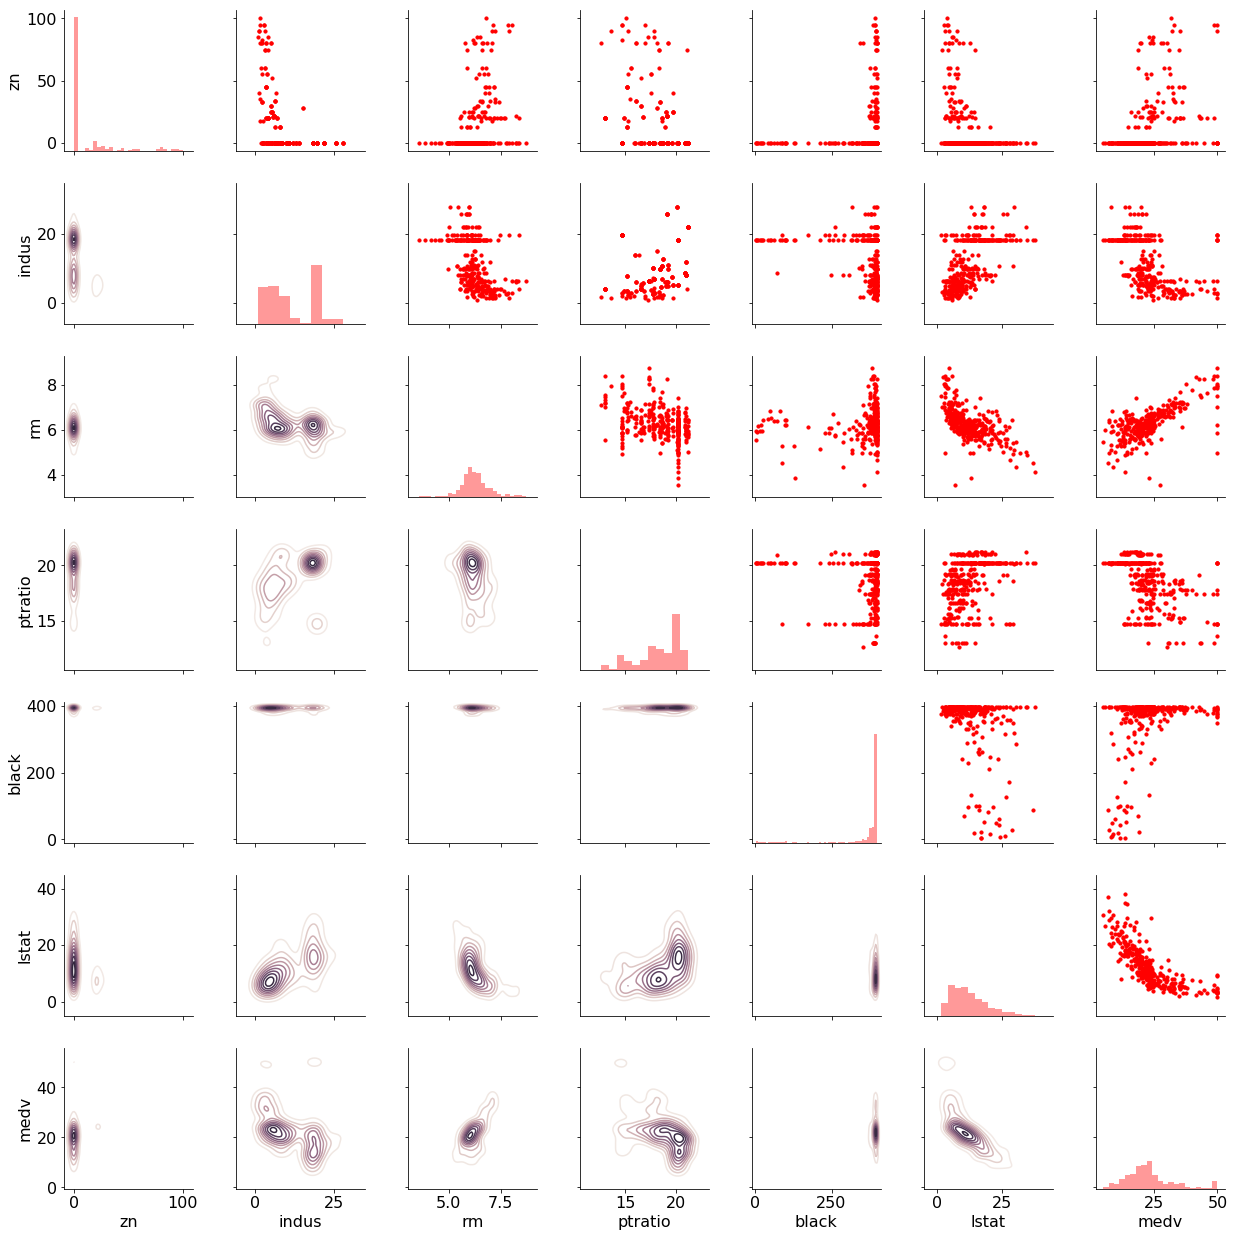

In [0]:
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(xtrain)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)

# On the diagonal, we have histograms showing the distribution of a single variable.
# The lower right traingle has both 2-D density plots.
# On the upper triangle, we have scatterplots of every variable plotted against one another.

In [0]:
xtrain.describe()

,zn,indus,rm,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,10.689189,11.293483,6.265619,18.448048,359.466096,12.515435,22.768769
std,22.674762,6.998123,0.703952,2.151821,86.584567,7.067781,9.173468
min,0.000000,0.740000,3.561000,12.600000,3.500000,1.730000,5.000000
25%,0.000000,5.130000,5.884000,17.400000,376.730000,7.180000,17.400000
50%,0.000000,9.900000,6.202000,19.000000,392.050000,10.970000,21.600000
75%,12.500000,18.100000,6.595000,20.200000,396.240000,16.420000,25.000000
max,100.000000,27.740000,8.725000,21.200000,396.900000,37.970000,50.000000


In [0]:

def evaluate_predictions(predictions,true):
    mae=np.mean(abs(predictions-true)) # mean absolute error
    rmse=np.sqrt(np.mean((predictions - true) ** 2)) # root mean squared error
    
    return mae,rmse


In [0]:
testing=pd.read_csv('test.csv')
testing.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [0]:
xtest=testing.drop(columns=['tax', 'nox', 'crim', 'age','rad','ID','chas','dis'])
xtest.head()
xtest.shape

(173, 6)

In [0]:
xtest.head()

,zn,indus,rm,ptratio,black,lstat
0,0.0,7.07,7.185,17.8,392.83,4.03
1,0.0,2.18,6.430,18.7,394.12,5.21
2,12.5,7.87,6.172,15.2,396.90,19.15
3,12.5,7.87,5.631,15.2,386.63,29.93
4,12.5,7.87,6.004,15.2,386.71,17.10


In [0]:
xtrain.head()

,zn,indus,rm,ptratio,black,lstat,medv
0,18.0,2.31,6.575,15.3,396.90,4.98,24.0
1,0.0,7.07,6.421,17.8,396.90,9.14,21.6
2,0.0,2.18,6.998,18.7,394.63,2.94,33.4
3,0.0,2.18,7.147,18.7,396.90,5.33,36.2
4,12.5,7.87,6.012,15.2,395.60,12.43,22.9


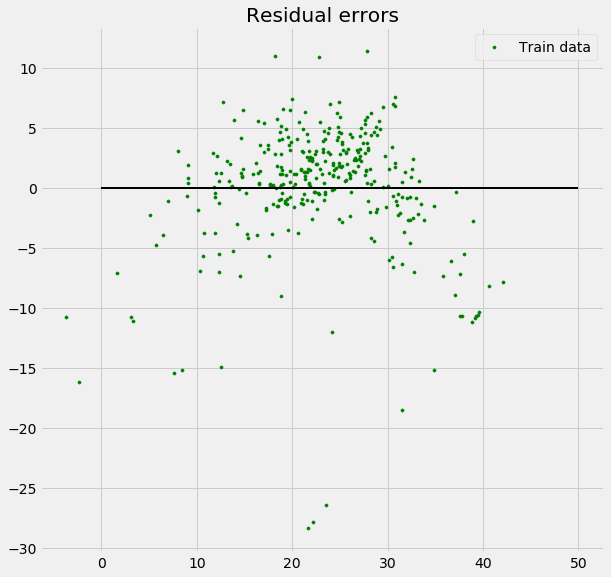

In [0]:
# Implementing ordinary least squared linear regresion
xtrain1=xtrain.drop(columns=['medv'])
xtrain1['x0']=1
X=xtrain1.values
ytrain1=xtrain['medv']
Y=ytrain1.values
X1=X.transpose()
A=np.matmul(X1,X)
A=np.linalg.inv(A)
B=np.matmul(X1,Y)
weights=np.matmul(A,B)

predicted=np.matmul(X,weights)

#plotting residual errors
## setting plot style 
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(predicted, predicted - Y, 
            color = "green", s = 10, label = 'Train data') 
   
  

## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 

In [0]:
# Formula for Bayesian Linear Regression (follows R formula syntax)
# In this syntax, ~, is read as “is a function of”. 
# We are telling the model that Grade is a linear combination of the six features on the right side of the tilde.
formula = 'medv ~ ' + ' + '.join(['%s' % variable for variable in xtrain.columns[0:6:]])
formula


'medv ~ zn + indus + rm + ptratio + black + lstat'

In [0]:
# We now build the model using the formula defined above and a normal distribution for the data likelihood.
# Then, we let a Markov Chain Monte Carlo algorithm draw samples from the posterior to approximate the posterior for each of the model parameters.
with pm.Model() as normal_model:
    
    # The prior for the model parameters will be a normal distribution
    family = pm.glm.families.Normal()
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = xtrain, family = family)
    
    # Perform Markov Chain Monte Carlo sampling
    normal_trace = pm.sample(draws=2000, chains = 2, tune = 500)
   

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, lstat, black, ptratio, rm, indus, zn, Intercept]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 5000/5000 [12:50:16<00:00,  1.81s/draws]
The acceptance probability does not match the target. It is 0.9090081186423999, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.940921248468379, but should be close to 0.8. Try to increase the number of tuning steps.


In [0]:
# Shows the trace with a vertical line at the mean of the trace
def plot_trace(trace):
    # Traceplot with vertical lines at the mean value
    ax = pm.traceplot(trace, figsize=(14, len(trace.varnames)*1.8),
                      lines={k: v['mean'] for k, v in pm.df_summary(trace).iterrows()})
    
    matplotlib.rcParams['font.size'] = 16
    
    # Labels with the median value
    for i, mn in enumerate(pm.df_summary(trace)['mean']):
        ax[i, 0].annotate('{:0.2f}'.format(mn), xy = (mn, 0), xycoords = 'data', size = 8,
                          xytext = (-18, 18), textcoords = 'offset points', rotation = 90,
                          va = 'bottom', fontsize = 'large', color = 'red')

C:\Users\Debarsho\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:56: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  chain_likelihoods.append(np.stack(log_like))


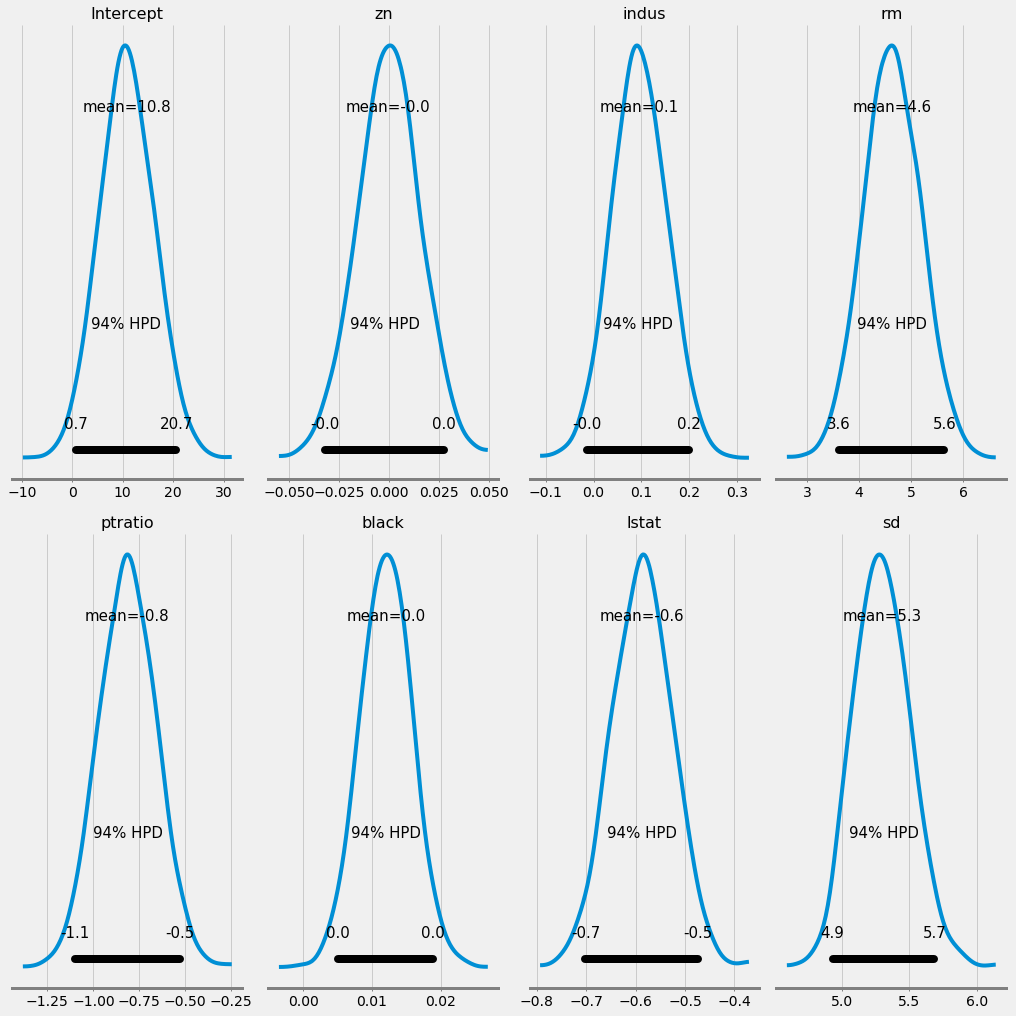

In [0]:
pm.plot_posterior(normal_trace, figsize = (14, 14), text_size=20);
# prosterior distribution

In [0]:
# Linear Formula from Bayesian Inference using Mean of Parameters
model_formula = 'Grade = '
for variable in normal_trace.varnames:
    model_formula += ' %0.2f * %s +' % (np.mean(normal_trace[variable]), variable)

' '.join(model_formula.split(' ')[:-1])

'Grade =  10.78 * Intercept + -0.00 * zn + 0.10 * indus + 4.63 * rm + -0.82 * ptratio + 0.01 * black + -0.59 * lstat + 1.67 * sd_log__ + 5.30 * sd'

In [0]:
# Examines the effect of changing a single variable
# Takes in the name of the variable, the trace, and the data
def model_effect(query_var, trace, X):
    
    # Variables that do not change
    steady_vars = list(X.columns)
    steady_vars.remove(query_var)
    
    # Linear Model that estimates a grade based on the value of the query variable 
    # and one sample from the trace
    def lm(value, sample):
        
        # Prediction is the estimate given a value of the query variable
        prediction = sample['Intercept'] + sample[query_var] * value
        
        # Each non-query variable is assumed to be at the median value
        for var in steady_vars:
            
            # Multiply the weight by the median value of the variable
            prediction += sample[var] * X[var].median()
        
        return prediction
    
    figsize(6, 6)
    
    # Find the minimum and maximum values for the range of the query var
    var_min = X[query_var].min()
    var_max = X[query_var].max()
    
    # Plot the estimated grade versus the range of query variable
    pm.plot_posterior_predictive_glm(trace, eval=np.linspace(var_min, var_max, 100), 
                                     lm=lm, samples=100, color='blue', 
                                     alpha = 0.4, lw = 2)
    
    # Plot formatting
    plt.xlabel('%s' % query_var, size = 16)
    plt.ylabel('medv', size = 16)
    plt.title("Posterior of medv vs %s" % query_var, size = 18)
    plt.show()


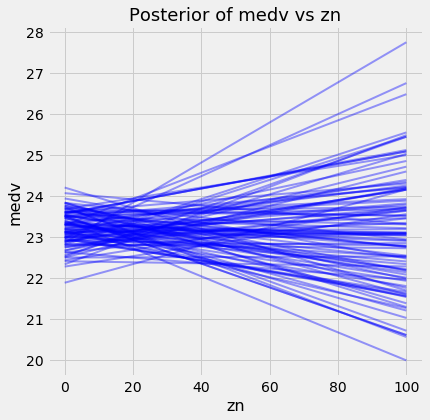

In [0]:
model_effect('zn', normal_trace, xtrain.drop(columns='medv'))

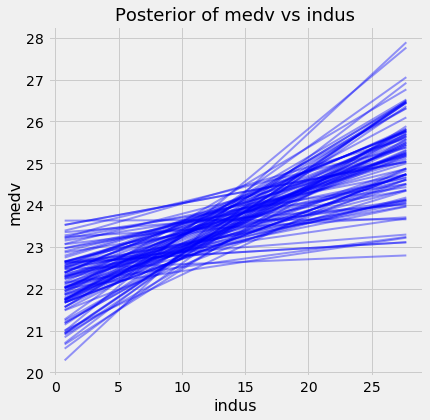

In [0]:
model_effect('indus', normal_trace, xtrain.drop(columns='medv'))

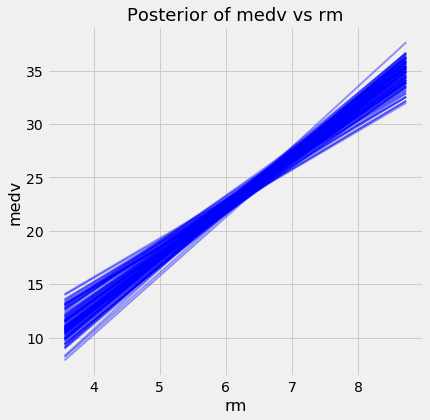

In [0]:
model_effect('rm', normal_trace, xtrain.drop(columns='medv'))

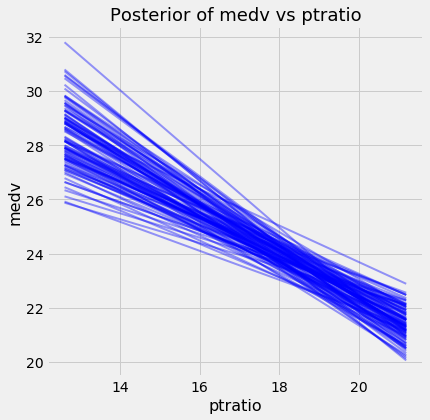

In [0]:
model_effect('ptratio', normal_trace, xtrain.drop(columns='medv'))

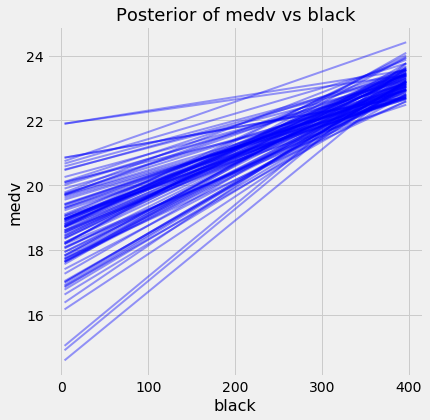

In [0]:
model_effect('black', normal_trace, xtrain.drop(columns='medv'))

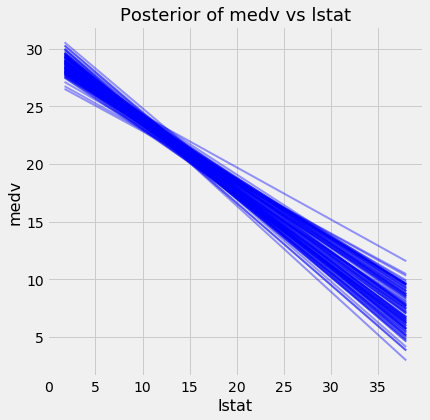

In [0]:
model_effect('lstat', normal_trace, xtrain.drop(columns='medv'))